In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# для первого запуска установить библиотеки:
# !pip install kaggle
# !pip install opendatasets

import opendatasets as od

dataset = 'https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset'
file = 'players_22.csv'

# загрузка датасета с kaggle
od.download(dataset)

100%|██████████| 109M/109M [00:03<00:00, 30.1MB/s] 


In [3]:
cd

C:\Users\DNS


In [4]:
cd data_analyst_projects

C:\Users\DNS\data_analyst_projects


In [5]:
cd fifa-22-complete-player-dataset

C:\Users\DNS\data_analyst_projects\fifa-22-complete-player-dataset


In [6]:
df = pd.read_csv(file)

C:\Users\DNS\AppData\Local\Temp\ipykernel_1140\2131829638.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [7]:
#most popular tags and traits

def clean_marks(marks_list, tag): # getting only words in mark
    output = []
    for mark in marks_list:
        if tag:
            mark = mark[mark.find('#') + 1:]
        output.append(mark.strip())
    return output    

players_tags = pd.DataFrame()
players_traits = pd.DataFrame() 

for string in df.itertuples(): # iteration by rows as turples
    player_tags = {}
    player_traits = {}
    player_name = string[3]
    player_tags['player_name'] = player_name
    player_traits['player_name'] = player_name    
    try:
        tags = clean_marks(string[36].split(','), tag = True) # 36 = tags
    except:
        tags = []
    try:
        traits = clean_marks(string[37].split(','), tag = False) # 37 = traits
    except:
        traits = []

    for tag in tags:
        player_tags[tag] = 1
    for trait in traits:
        player_traits[trait] = 1
    players_tags = players_tags._append(player_tags, ignore_index=True)
    players_traits = players_traits._append(player_traits, ignore_index=True)


In [8]:
# making one-hot-encoding

for column in players_tags.columns:
    if column != 'player_name':
        players_tags[column] = players_tags[column].fillna(0).astype('Int64')

for column in players_traits.columns:
    if column != 'player_name':
        players_traits[column] = players_traits[column].fillna(0).astype('Int64')

In [9]:
# creating data for corr mtrx

marks_corr = players_tags.merge(players_traits, 
                                how = 'outer', 
                                left_on='player_name', 
                                right_on='player_name')

for column in marks_corr.columns:
    if column != 'player_name':
        marks_corr[column] = marks_corr[column].fillna(0).astype('Int64')
        
del marks_corr['player_name']

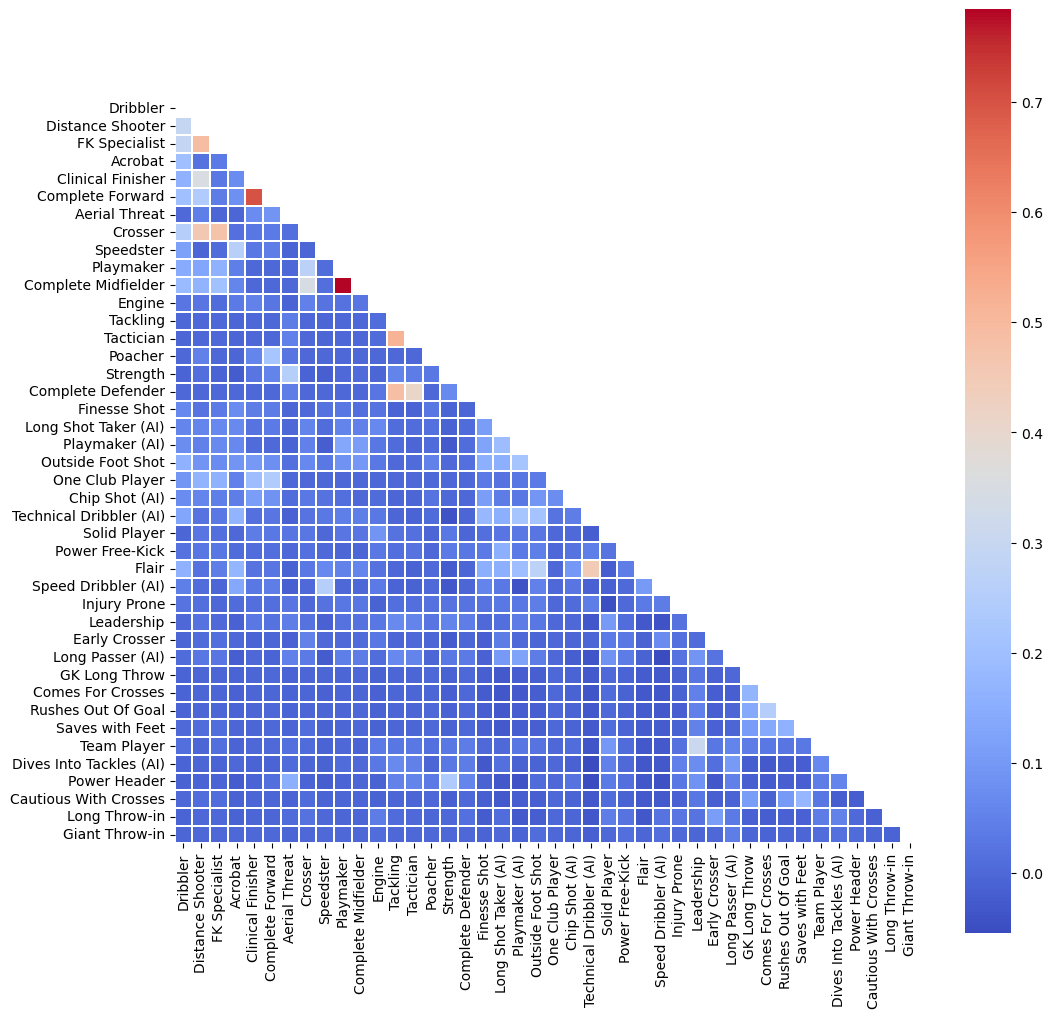

In [10]:
# heatmap of correlations

figsize = (12, 12)
matrix = np.triu(marks_corr.corr())
fig, ax = plt.subplots(figsize=figsize)
hmap = sns.heatmap(marks_corr.corr(), square=True, mask=matrix, linewidth=0.1, cmap= 'coolwarm')
plt.show()

In [11]:
# finding highest correlations

corr_data = marks_corr.corr()
corrs = [(corr_data.loc[row, col], row, col) for row in corr_data.columns for col in corr_data.columns]
max_corr = sorted(corrs, key=lambda x: abs(x[0]), reverse=True)[42::2]
for corr in max_corr:
    if corr[0] >= 0.35:
        print('coef:', round(corr[0], 2))
        print('factor_1:', corr[1])
        print('factor_2:', corr[2], '\n')

coef: 0.78
factor_1: Playmaker
factor_2: Complete Midfielder 

coef: 0.7
factor_1: Clinical Finisher
factor_2: Complete Forward 

coef: 0.52
factor_1: Tackling
factor_2: Tactician 

coef: 0.49
factor_1: Distance Shooter
factor_2: FK Specialist 

coef: 0.49
factor_1: Tackling
factor_2: Complete Defender 

coef: 0.48
factor_1: FK Specialist
factor_2: Crosser 

coef: 0.46
factor_1: Distance Shooter
factor_2: Crosser 

coef: 0.45
factor_1: Technical Dribbler (AI)
factor_2: Flair 

coef: 0.41
factor_1: Tactician
factor_2: Complete Defender 

coef: 0.35
factor_1: Distance Shooter
factor_2: Clinical Finisher 



In [12]:
# marks with highest wage

marks_list = players_tags.columns.tolist()[1:] + players_traits.columns.tolist()[1:]
marks_mean_wage = {}

for mark in marks_list:
    mark_wages = []
    mark_names = []
    for string in df.itertuples():
        if (string[36] is not np.nan and mark in string[36]) or (string[37] is not np.nan and mark in string[37]):
            mark_wages.append(string[9])
            mark_names.append(string[3])
    mark_mean = pd.Series(mark_wages).mean().round(2)
    marks_mean_wage[mark] = mark_mean


marks_mean_wage = pd.Series(marks_mean_wage)
marks_mean_wage = marks_mean_wage.sort_values(ascending = False)
marks_mean_wage.head(10)

One Club Player        320000.00
Complete Midfielder    182000.00
Complete Forward       168294.12
Complete Defender      167600.00
Distance Shooter       164380.95
Clinical Finisher      149826.09
Tackling               127523.81
Poacher                122800.00
Tactician              112034.48
FK Specialist          106741.67
dtype: float64

Leo Messi is the one player with trait = one club player, so wage of this mark isn't usefull